In [26]:
import numpy as np
import pandas as pd
import scipy.io

In [119]:
files = ['attack1withlabels',
         'attack2withlabels',
         'attack4withlabels',
         'attack8withlabels',
         'attack16withlabels']

for filename in files:
    filepath = f'WiSec_DataModifiedVeremi_Dataset/{filename}.mat'
    
    mat = scipy.io.loadmat(filepath)

    df = pd.DataFrame(mat[filename], columns=[
        'type',
        'rcv_time',
        'receiver',
        'rcv_pos_x',
        'rcv_pos_y',
        'rcv_pos_z',
        'send_time',
        'sender',
        'message_id',
        'snd_pos_x',
        'snd_pos_y',
        'snd_pos_z',
        'snd_spd_x',
        'snd_spd_y',
        'snd_spd_z',
        'rssi',
        'label',
    ])
    df.drop(['rcv_pos_z',
             'snd_pos_z',
             'snd_spd_z'], axis=1, inplace=True)
    df.sort_values(['send_time', 'sender'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.dropna(inplace=True)
    
    # df = df[:round(df.shape[0] * 0.03)]
    split = round(df.shape[0] * 0.5)
    
    train = df[:split]    
    filtered_train = train[train.label == 0].drop(columns=['label'])
    filtered_train.to_csv(f'out_veremi2/train_{filename}.csv')

    train = train.drop(columns=['label'])
    train.to_csv(f'out_veremi2/train_no_filter_{filename}.csv')
    
    test = df[split:].drop(columns=['label'])
    test.to_csv(f'out_veremi2/test_{filename}.csv')
    
    y = (df['label'] > 0)[split:].astype(int)
    print(train.shape, test.shape, y.shape)
    
    labels = pd.concat([y] * len(test.columns), ignore_index=True, axis=1)
    labels.to_csv(f'out_veremi2/labels_{filename}.csv')

(193758, 13) (193758, 13) (193758,)
(193758, 13) (193758, 13) (193758,)
(193817, 13) (193817, 13) (193817,)
(193374, 13) (193373, 13) (193373,)
(193417, 13) (193417, 13) (193417,)


In [120]:
filepath = 'WiSec_DataModifiedVeremi_Dataset/attack16withlabels.mat'

mat = scipy.io.loadmat(filepath)

df = pd.DataFrame(mat[filename], columns=[
    'type',
    'rcv_time',
    'receiver',
    'rcv_pos_x',
    'rcv_pos_y',
    'rcv_pos_z',
    'send_time',
    'sender',
    'message_id',
    'snd_pos_x',
    'snd_pos_y',
    'snd_pos_z',
    'snd_spd_x',
    'snd_spd_y',
    'snd_spd_z',
    'rssi',
    'label',
])
df.drop(['rcv_pos_z',
         'snd_pos_z',
         'snd_spd_z'], axis=1, inplace=True)
df.sort_values(['sender', 'send_time'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df

,type,rcv_time,receiver,rcv_pos_x,rcv_pos_y,send_time,sender,message_id,snd_pos_x,snd_pos_y,snd_spd_x,snd_spd_y,rssi,label
0,3.0,21600.437700,58.0,3600.969939,6031.939394,21600.437587,7.0,4264.0,3584.386343,5805.241813,-0.030508,31.476991,7.941098e-09,0.0
1,3.0,21600.437699,334.0,3597.573445,5674.239194,21600.437587,7.0,4264.0,3584.386343,5805.241813,-0.030508,31.476991,2.717355e-09,0.0
2,3.0,21600.437700,388.0,3592.345910,6042.199113,21600.437587,7.0,4264.0,3584.386343,5805.241813,-0.030508,31.476991,5.719322e-09,0.0
3,3.0,21600.437700,556.0,3608.721585,6070.392939,21600.437587,7.0,4264.0,3584.386343,5805.241813,-0.030508,31.476991,9.910906e-09,0.0
4,3.0,21600.437701,148.0,3713.027467,5227.579498,21600.437587,7.0,4264.0,3584.386343,5805.241813,-0.030508,31.476991,1.379022e-09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424924,3.0,21959.512374,3694.0,6117.984222,5824.198817,21959.512259,3745.0,4973329.0,6170.087102,5826.131639,-0.774199,-0.077996,3.406667e-08,16.0
424925,3.0,21959.512374,3724.0,6152.899386,5824.400080,21959.512259,3745.0,4973329.0,6170.087102,5826.131639,-0.774199,-0.077996,2.559787e-07,16.0
424926,3.0,21959.512374,2536.0,6090.920102,5813.790177,21959.512259,3745.0,4973329.0,6170.087102,5826.131639,-0.774199,-0.077996,3.630931e-08,16.0
424927,3.0,21959.512374,3664.0,6102.724273,5819.345238,21959.512259,3745.0,4973329.0,6170.087102,5826.131639,-0.774199,-0.077996,3.024351e-08,16.0


<Axes: >

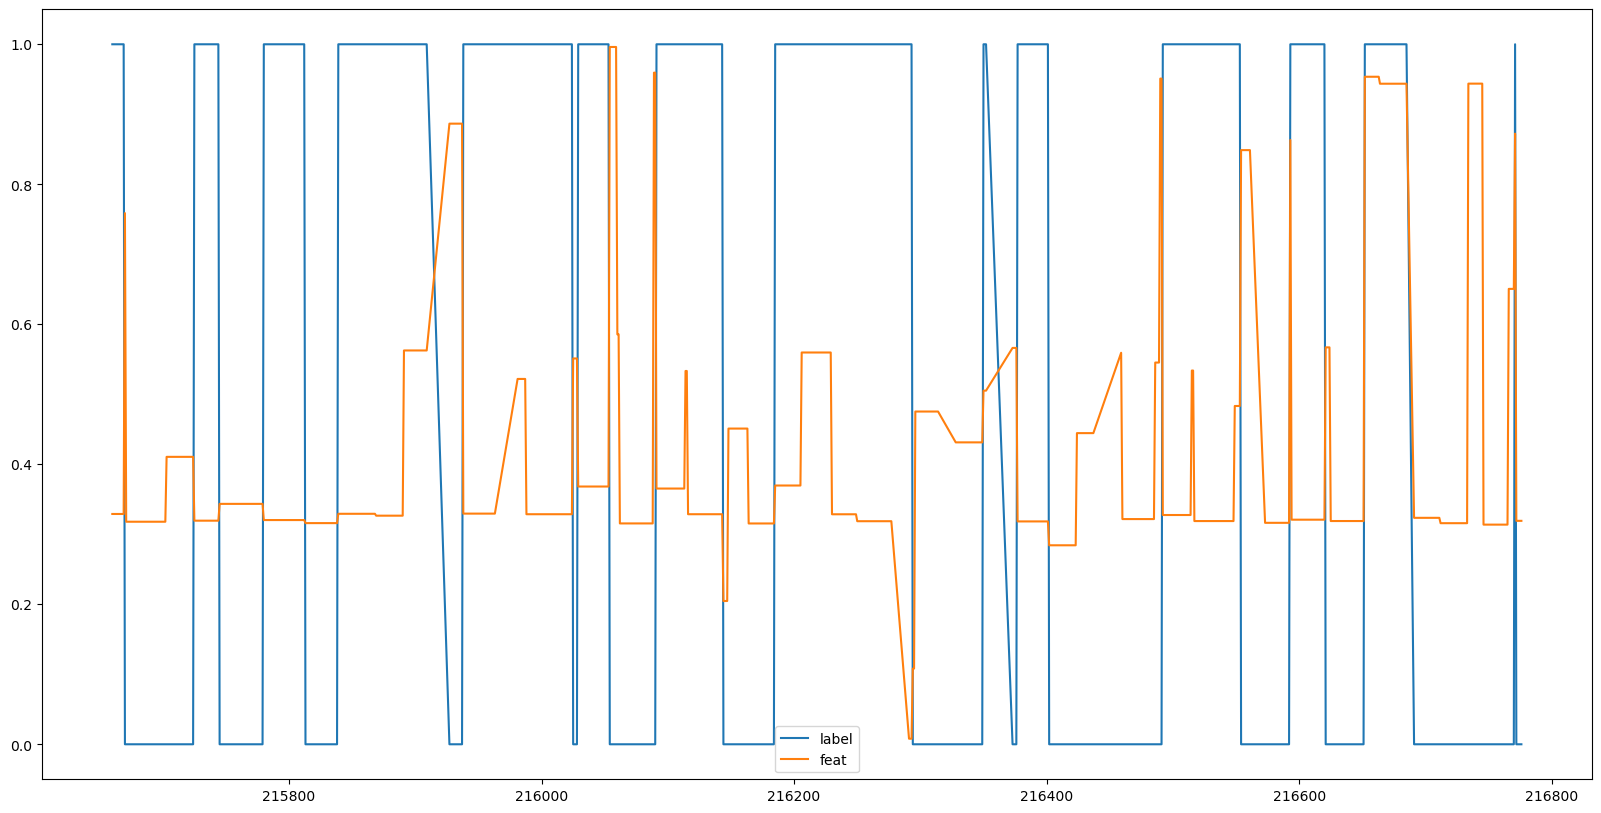

In [125]:
feat = test.snd_pos_x

head = 1000

feat_norm = (feat - feat.min()) / (feat.max() - feat.min())

pd.DataFrame({ 'label': labels[0].head(head), 'feat': feat_norm.head(head) }).plot(figsize=(20,10))